In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import sys
import shutil   
import matplotlib.pyplot as plt
from keras import backend as K
from keras.models import Sequential
from keras import optimizers
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Dense, GlobalAveragePooling2D, Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import History 
from sklearn.metrics import classification_report, confusion_matrix,plot_confusion_matrix,ConfusionMatrixDisplay,accuracy_score
import keras
from keras.layers.convolutional import Conv2D
from keras.layers import Dense
from keras.layers.convolutional import MaxPooling2D
from keras.layers import Flatten
# from keras.layers import LeakyReLU
# from keras.layers.normalization import batch_normalization
keras.layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, 
                                scale=True, beta_initializer='zeros', gamma_initializer='ones',
                                moving_mean_initializer='zeros', moving_variance_initializer='ones', 
                                beta_regularizer=None, gamma_regularizer=None, beta_constraint=None, 
                                gamma_constraint=None)

import warnings
warnings.filterwarnings('ignore')
# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

In [2]:
train = 'c:/Users/jadha/Data/MTP_data_underwater/Train'
val = 'c:/Users/jadha/Data/MTP_data_underwater/Val'
test = 'c:/Users/jadha/Data/MTP_data_underwater/Test'

In [3]:
# Total number of training images
num_of_train_samples = 0
for train_dataset in os.listdir(train):
    in_folder = train + "/" + train_dataset 
    in_folder_list = os.listdir(in_folder)
    num_of_train_samples = num_of_train_samples + len(in_folder_list)
print("Number of Training samples   : ",num_of_train_samples)

# Total number of validation images
num_of_validation_samples = 0
for validation_dataset in os.listdir(val):
    in_folder_val = val + "/" + validation_dataset
    in_folder_val_list = os.listdir(in_folder_val)
    num_of_validation_samples = num_of_validation_samples + len(in_folder_val_list)
print("Number of Validation samples : ", num_of_validation_samples)

# Total number of testing images
num_of_test_samples = 0
for testing_dataset in os.listdir(test):
    in_folder_test = test + "/" + testing_dataset
    in_folder_test_list = os.listdir(in_folder_test)
    num_of_test_samples = num_of_test_samples + len(in_folder_test_list)
print("Number of Test samples : ", num_of_test_samples)

Number of Training samples   :  459
Number of Validation samples :  90
Number of Test samples :  53


In [4]:
for validation_dataset in os.listdir(train):
    print(validation_dataset)

Catla
Mrigal
Rohu
Tilapia
Tuna


In [5]:
train_datagen = ImageDataGenerator(rescale=1. / 255,
                                   rotation_range=40,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

val_datagen = ImageDataGenerator(rescale=1. / 255)

test_datagen=ImageDataGenerator(rescale=1./255)

In [6]:
batch_size = 64
learning_rate = 0.01
epoch = 100

# Defining image width and height respectively
img_rows = 256
img_cols = 256

In [7]:
train_generator = train_datagen.flow_from_directory(train,
                                                    target_size = (img_rows, img_cols),
                                                    batch_size = batch_size,
                                                    class_mode = 'categorical')

validation_generator = val_datagen.flow_from_directory(val,
                                                        target_size = (img_rows, img_cols),
                                                        batch_size = batch_size,
                                                        shuffle = False, class_mode='categorical')

test_generator = test_datagen.flow_from_directory(test,
                                                        target_size = (img_rows, img_cols),
                                                        batch_size = batch_size,
                                                        shuffle = False, class_mode='categorical')

Found 459 images belonging to 5 classes.
Found 90 images belonging to 5 classes.
Found 53 images belonging to 5 classes.


In [8]:
px=train_generator[4][0][7]
px

array([[[0.34504664, 0.30190936, 0.28622308],
        [0.35873356, 0.31559628, 0.29991   ],
        [0.35783672, 0.31469947, 0.2990132 ],
        ...,
        [0.29151747, 0.27190962, 0.26014492],
        [0.29458782, 0.27497998, 0.26321527],
        [0.29570803, 0.2761002 , 0.26433548]],

       [[0.34384736, 0.3007101 , 0.28502384],
        [0.3539366 , 0.31079936, 0.2951131 ],
        [0.35903594, 0.3158987 , 0.3002124 ],
        ...,
        [0.2972051 , 0.27759725, 0.26583254],
        [0.2983253 , 0.27871746, 0.26695275],
        [0.2994455 , 0.27983764, 0.26807293]],

       [[0.34264815, 0.2995109 , 0.28382462],
        [0.34913966, 0.3060024 , 0.29031613],
        [0.36023518, 0.31709793, 0.30141166],
        ...,
        [0.3009426 , 0.28133476, 0.26957005],
        [0.30206278, 0.2824549 , 0.2706902 ],
        [0.30318296, 0.28357512, 0.2718104 ]],

       ...,

       [[0.41543123, 0.38798025, 0.3566077 ],
        [0.41207066, 0.38461968, 0.35324714],
        [0.41176474, 0

In [9]:
px.shape

(256, 256, 3)

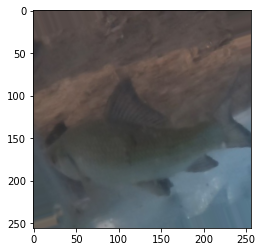

In [10]:
plt.imshow(px)

In [11]:
test_generator.dtype

'float32'

In [12]:
# for i in test_generator:
#         print(i)
test_generator[0][-1]

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0.

In [13]:
steps_per_epoch_inc = num_of_train_samples // batch_size
print("Steps per epoch: ",steps_per_epoch_inc)

Steps per epoch:  7


# Create model
add new classification layer

In [14]:
from keras.applications import InceptionV3
# The sequential API allows us to create model layer by layer
inc_model = Sequential()
inc_model.add(InceptionV3(include_top=False, 
                      pooling='max',
                      weights='imagenet'))
# inc_model.add(Dense(32, activation="relu"))

inc_model.add(Dense(5, activation="softmax"))

# Summary: to find the number of parameters
inc_model.layers[0].trainable=False
inc_model.summary()

adam = optimizers.Adam(lr=learning_rate, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.00001)
inc_model.compile(loss="categorical_crossentropy",
              optimizer=adam,
              metrics=["accuracy"])


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 2048)              21802784  
                                                                 
 dense (Dense)               (None, 5)                 10245     
                                                                 
Total params: 21,813,029
Trainable params: 10,245
Non-trainable params: 21,802,784
_________________________________________________________________


In [15]:
from keras.callbacks import LearningRateScheduler

# Define a learning rate schedule function
def lr_schedule(epoch):
    if epoch < 15:
        return 0.01
    if epoch < 40:
        return 0.001
    elif epoch < 80:
        return 0.0001
    else:
        return 0.00001

# Create a LearningRateScheduler callback using the lr_schedule function
lr_schedule_callback = LearningRateScheduler(lr_schedule)

In [16]:
# from keras.callbacks import TensorBoard
# from calendar import datetime
# # Create a TensorBoard callback to log data for visualization
# log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
# tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

In [17]:
inc_training = inc_model.fit_generator(train_generator,
                                       epochs = epoch,
                                      validation_data = validation_generator,callbacks=[lr_schedule_callback])

Epoch 1/100
8/8 [==============================] - 36s 4s/step - loss: 18.6167 - accuracy: 0.3224 - val_loss: 4.9593 - val_accuracy: 0.3333 - lr: 0.0100
Epoch 2/100
8/8 [==============================] - 24s 3s/step - loss: 6.6705 - accuracy: 0.4118 - val_loss: 4.7855 - val_accuracy: 0.4889 - lr: 0.0100
Epoch 3/100
8/8 [==============================] - 23s 3s/step - loss: 4.9986 - accuracy: 0.5120 - val_loss: 3.8113 - val_accuracy: 0.5556 - lr: 0.0100
Epoch 4/100
8/8 [==============================] - 25s 3s/step - loss: 2.9088 - accuracy: 0.6427 - val_loss: 3.6107 - val_accuracy: 0.5333 - lr: 0.0100
Epoch 5/100
8/8 [==============================] - 30s 4s/step - loss: 3.0169 - accuracy: 0.6601 - val_loss: 2.2692 - val_accuracy: 0.5778 - lr: 0.0100
Epoch 6/100
8/8 [==============================] - 51s 6s/step - loss: 2.1292 - accuracy: 0.6688 - val_loss: 2.4824 - val_accuracy: 0.5889 - lr: 0.0100
Epoch 7/100
8/8 [==============================] - 51s 6s/step - loss: 1.4161 - accurac

8/8 [==============================] - 23s 3s/step - loss: 0.1910 - accuracy: 0.9237 - val_loss: 0.4674 - val_accuracy: 0.8333 - lr: 1.0000e-04
Epoch 55/100
8/8 [==============================] - 23s 3s/step - loss: 0.2389 - accuracy: 0.9063 - val_loss: 0.4734 - val_accuracy: 0.8333 - lr: 1.0000e-04
Epoch 56/100
8/8 [==============================] - 23s 3s/step - loss: 0.2597 - accuracy: 0.9041 - val_loss: 0.4730 - val_accuracy: 0.8333 - lr: 1.0000e-04
Epoch 57/100
8/8 [==============================] - 23s 3s/step - loss: 0.2542 - accuracy: 0.9063 - val_loss: 0.4662 - val_accuracy: 0.8333 - lr: 1.0000e-04
Epoch 58/100
8/8 [==============================] - 23s 3s/step - loss: 0.2347 - accuracy: 0.9237 - val_loss: 0.4729 - val_accuracy: 0.8333 - lr: 1.0000e-04
Epoch 59/100
8/8 [==============================] - 23s 3s/step - loss: 0.2178 - accuracy: 0.9259 - val_loss: 0.4839 - val_accuracy: 0.8333 - lr: 1.0000e-04
Epoch 60/100
8/8 [==============================] - 23s 3s/step - loss:

In [18]:
inc_training.history

{'loss': [18.616731643676758,
  6.670498371124268,
  4.9986443519592285,
  2.9088172912597656,
  3.016942262649536,
  2.1291663646698,
  1.4161317348480225,
  1.74886953830719,
  1.3142017126083374,
  1.331586480140686,
  0.953559398651123,
  0.7802327871322632,
  0.6004731059074402,
  0.5790829062461853,
  0.5767245292663574,
  0.5190381407737732,
  0.34211108088493347,
  0.3185654580593109,
  0.3016514778137207,
  0.30453571677207947,
  0.29332250356674194,
  0.39657676219940186,
  0.27667662501335144,
  0.32580339908599854,
  0.30711570382118225,
  0.2910737693309784,
  0.26199015974998474,
  0.22895635664463043,
  0.2500005066394806,
  0.3160970211029053,
  0.3152550160884857,
  0.2809220850467682,
  0.3338024616241455,
  0.23111216723918915,
  0.25074028968811035,
  0.2858782112598419,
  0.24311070144176483,
  0.2194601148366928,
  0.2583838701248169,
  0.2526249289512634,
  0.26891928911209106,
  0.2603631317615509,
  0.2429739534854889,
  0.1819171905517578,
  0.2115946412086486

In [19]:
# !kill 19684

In [20]:
# %load_ext tensorboard

In [21]:
# %reload_ext tensorboard

In [22]:
# %tensorboard --logdir logs/fit

In [23]:
# tensorboard --logdir logs/fit --port 6007
# http://localhost:6007/

# Training accuracy

In [24]:
inc_model.evaluate(train_generator)

8/8 [==============================] - 17s 2s/step - loss: 0.2360 - accuracy: 0.9194


[0.23600177466869354, 0.9193899631500244]

# Validation accuracy

In [25]:
inc_model.evaluate(validation_generator)

2/2 [==============================] - 3s 868ms/step - loss: 0.4622 - accuracy: 0.8333


[0.46217650175094604, 0.8333333134651184]

# Testing accuracy

In [26]:
inc_model.evaluate(test_generator)

1/1 [==============================] - 2s 2s/step - loss: 0.4097 - accuracy: 0.8302


[0.4096601903438568, 0.8301886916160583]

# Prediction

In [27]:
predictions=inc_model.predict(test_generator)
predictions

1/1 [==============================] - 4s 4s/step


array([[8.85879919e-02, 9.92137939e-03, 9.01435375e-01, 5.48153585e-05,
        4.55736000e-07],
       [5.38363159e-01, 1.59266159e-01, 3.02070409e-01, 3.00186337e-04,
        1.44217806e-11],
       [9.97974455e-01, 3.56703231e-06, 1.45300338e-03, 5.68966381e-04,
        5.75108884e-12],
       [9.99726832e-01, 5.47601076e-06, 1.26574625e-04, 1.41101627e-04,
        9.47381536e-17],
       [1.12981059e-01, 3.19068646e-03, 8.83675337e-01, 1.52865177e-04,
        1.24435302e-15],
       [2.27374181e-01, 3.06257755e-02, 7.41669178e-01, 3.30870505e-04,
        1.10384646e-09],
       [8.96855116e-01, 9.87688676e-02, 3.93169094e-03, 4.44234873e-04,
        2.02862445e-12],
       [9.98089254e-01, 3.68594046e-04, 1.51427521e-03, 2.78225289e-05,
        1.38253992e-10],
       [9.71229374e-01, 1.37465950e-02, 4.14225599e-03, 1.08739333e-02,
        7.81796462e-06],
       [3.08340173e-02, 3.20133567e-02, 9.37151611e-01, 1.02794206e-06,
        1.58948958e-13],
       [9.98988211e-01, 5.3676

In [28]:
np.argmax(predictions[19])

1

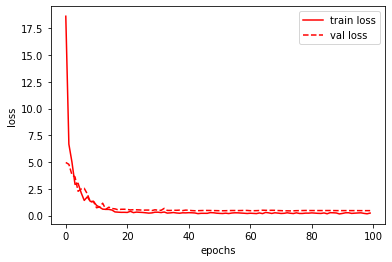

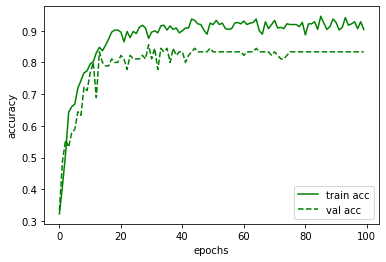

In [29]:
plt.plot(inc_training.history['loss'], label='train loss',color='r')
plt.plot(inc_training.history['val_loss'], label='val loss',color='r',linestyle='--',)
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()
# plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(inc_training.history['accuracy'], label='train acc',color='g')
plt.plot(inc_training.history['val_accuracy'], label='val acc',color='g',linestyle='--')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()
# plt.savefig('AccVal_acc')

In [30]:
training_accuracy_inc      = inc_training.history['accuracy'][-1]
training_loss_inc          = inc_training.history['loss'][-1]
validation_accuracy_inc    = inc_training.history['val_accuracy'][-1]
validation_loss_inc        = inc_training.history['val_loss'][-1]
print("Training Accuracy Inception   :", training_accuracy_inc )
print("Training Loss Inception       :", training_loss_inc)
print("Validation Accuracy Inception :", validation_accuracy_inc)
print("Validation Loss Inception     :", validation_loss_inc)

Training Accuracy Inception   : 0.9041394591331482
Training Loss Inception       : 0.23453696072101593
Validation Accuracy Inception : 0.8333333134651184
Validation Loss Inception     : 0.46217650175094604


In [31]:
for validation_dataset in os.listdir(train):
    print(validation_dataset)

Catla
Mrigal
Rohu
Tilapia
Tuna


In [32]:
# Generating Confusion Matrix and Classification Report
Y_pred_inc = inc_model.predict_generator(test_generator, num_of_test_samples // batch_size+1)
y_pred_inc = np.argmax(Y_pred_inc, axis=1)
print('Confusion Matrix')
conf_matrix_inc = confusion_matrix(test_generator.classes, y_pred_inc)
cm_inc = np.array2string(conf_matrix_inc)
print(conf_matrix_inc)
print("**=============================================================================================**")
print('Classification Report')
target_names = ['Catla','Mrigal','Rohu','Tilapia','Tuna']
class_rep_inc = classification_report(test_generator.classes, y_pred_inc, target_names=target_names)
print(class_rep_inc)

Confusion Matrix
[[ 7  0  4  0  0]
 [ 1 10  0  1  0]
 [ 0  3  7  0  0]
 [ 0  0  0 12  0]
 [ 0  0  0  0  8]]
**=============================================================================================**
Classification Report
              precision    recall  f1-score   support

       Catla       0.88      0.64      0.74        11
      Mrigal       0.77      0.83      0.80        12
        Rohu       0.64      0.70      0.67        10
     Tilapia       0.92      1.00      0.96        12
        Tuna       1.00      1.00      1.00         8

    accuracy                           0.83        53
   macro avg       0.84      0.83      0.83        53
weighted avg       0.84      0.83      0.83        53



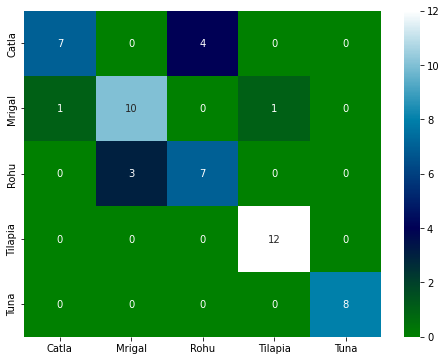

In [33]:
import seaborn as sns
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix_inc, annot=True, cmap='ocean',xticklabels=target_names,yticklabels=target_names)
plt.show()

In [34]:
accuracy_score(test_generator.classes, y_pred_inc)

0.8301886792452831

# predicting single image

In [34]:
import cv2 as cv

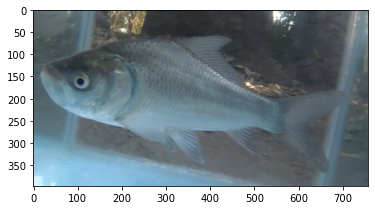

In [35]:
fish_img=plt.imread("c:/Users/jadha/Data/MTP_data_underwater/Test/Catla/001 (24).jpg")
plt.imshow(fish_img)
plt.show()

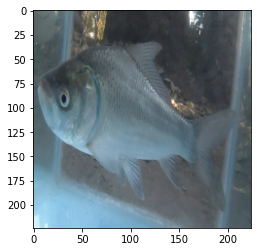

In [36]:
fish_img=cv.resize(fish_img,(224,224))
plt.imshow(fish_img)
plt.show()

In [37]:
fish_img.shape

(224, 224, 3)

In [38]:
fish_img=fish_img.reshape(224,224,3)
fish_img.shape

(224, 224, 3)

In [39]:
from tensorflow.keras.preprocessing import image

In [40]:
x=image.img_to_array(fish_img)
x=np.expand_dims(x,axis=0)

In [41]:
inc_model.predict(x)

1/1 [==============================] - 1s 1s/step


array([[1.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        2.791089e-38]], dtype=float32)

In [42]:
fish=['Catla','Mrigal','Rohu','Tilapia','Tuna']
pridicted_fish=fish[np.argmax(inc_model.predict(x)[0])]
pridicted_fish

1/1 [==============================] - 0s 61ms/step


'Catla'

# Save the model

In [35]:
inc_model.save('model.h5')

# Deployment

In [40]:
# pip install streamlit

In [5]:
# import streamlit as st
# import numpy as np
# import cv2
# import tensorflow as tf

In [4]:
# # Load the model
# model = tf.keras.models.load_model('model.h5')

In [3]:
# # Define the prediction function
# def predict(image):
#     # Preprocess the image
#     image = cv2.resize(image, (224, 224))
#     image = np.expand_dims(image, axis=0)
#     image = image.astype('float32') / 255.0

#     # Make the prediction
#     prediction = model.predict(image)
#     label = np.argmax(prediction)

#     return label

In [2]:
# # Define the Streamlit app
# st.title('Image Classification App')
# uploaded_file = st.file_uploader('Choose an image', type=['jpg', 'jpeg', 'png'])
# if uploaded_file is not None:
#     # Read the image file from the uploader
#     image = cv2.imdecode(np.fromstring(uploaded_file.read(), np.uint8), 1)

#     # Display the image
#     st.image(image, caption='Uploaded Image', use_column_width=True)

#     # Make the prediction
#     label = predict(image)
#     st.write(f'Prediction: {label}')

In [1]:
# conda list streamlit